# CUISINE CLASSIFICATION

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier

### READING THE DATASET

In [2]:
data = pd.read_csv('Dataset.csv')

### EXPLORATORY DATA ANALYSIS

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
data.shape

(9551, 21)

### CHECKING FOR NULL VALUES

In [7]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### HANDLING NULL VALUES

In [8]:
data = data.dropna(subset=['Cuisines'])

In [9]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### ENCODING THE DATA

In [10]:
label_encoders = {}
for column in ['City', 'Locality', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

### PREPROCESSING THE DATA

In [11]:
X = data.drop(['Cuisines', 'Restaurant Name', 'Address', 'Locality Verbose'], axis=1)
y = data['Cuisines']

### TRAIN AND TEST SPLIT

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### MODEL DEPLOYMENT

####  Random Forest Classifier

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### MODEL'S PERFORMANCE

In [14]:
y_pred = model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='micro')
recall_rf = recall_score(y_test, y_pred, average='micro')
print(f'Recall: {recall_rf}')
print(f'Accuracy: {accuracy_rf}')
print(f'Precision: {precision_rf}')
print("Classification Report:\n", classification_report(y_test, y_pred))

Recall: 0.11891042430591933
Accuracy: 0.11891042430591933
Precision: 0.11891042430591933
Classification Report:
                                                                                           precision    recall  f1-score   support

                                                                                 Afghani       0.00      0.00      0.00         0
                                                               Afghani, Mughlai, Chinese       0.00      0.00      0.00         1
                                               Afghani, North Indian, Pakistani, Arabian       0.00      0.00      0.00         0
                                                                                 African       0.00      0.00      0.00         0
                                                                     African, Portuguese       0.00      0.00      0.00         0
                                                                                American       0.00      0

/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

#### Logistic Regressor

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

#### MODEL'S PERFORMANCE

In [16]:
y_pred = model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='micro')
recall_lr = recall_score(y_test, y_pred, average='micro')
print(f'Recall: {recall_lr}')
print(f'Accuracy: {accuracy_lr}')
print(f'Precision: {precision_lr}')
print("Classification Report:\n", classification_report(y_test, y_pred))

Recall: 0.09219486642221059
Accuracy: 0.09219486642221059
Precision: 0.09219486642221059
Classification Report:
                                                                                           precision    recall  f1-score   support

                                                               Afghani, Mughlai, Chinese       0.00      0.00      0.00         1
                                                                                American       0.00      0.00      0.00         3
                                                                    American, BBQ, Steak       0.00      0.00      0.00         3
                                                                      American, Bar Food       0.00      0.00      0.00         1
                                                                     American, Breakfast       0.00      0.00      0.00         1
                                                              American, Breakfast, Greek       0.00      0

/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

#### Decision Tree Classifier

In [17]:
model = DecisionTreeClassifier(random_state=42)

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### MODEL'S PERFORMANCE

In [19]:
y_pred = model.predict(X_test)

In [20]:
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average='micro')
recall_dt = recall_score(y_test, y_pred, average='micro')
print(f'Recall: {recall_dt}')
print(f'Accuracy: {accuracy_dt}')
print(f'Precision: {precision_dt}')
print("Classification Report:\n", classification_report(y_test, y_pred))

Recall: 0.07019381875327396
Accuracy: 0.07019381875327396
Precision: 0.07019381875327396
Classification Report:
                                                                                           precision    recall  f1-score   support

                                                                                 Afghani       0.00      0.00      0.00         0
                                                               Afghani, Mughlai, Chinese       0.00      0.00      0.00         1
                                                                                 African       0.00      0.00      0.00         0
                                                                                American       0.00      0.00      0.00         3
                                                       American, Asian, Italian, Seafood       0.00      0.00      0.00         0
                                                                  American, BBQ, Seafood       0.00      0

/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

### COMPARISON OF MODEL'S PERFORMANCE BASED ON ACCURACY_SCORE

In [21]:
comparison_data_a = {
    'Model': ['Random Forest', 'Logistic', 'Decision Tree'],
    'Accuracy': [accuracy_rf, accuracy_lr, accuracy_dt],
}
comparison_dfa = pd.DataFrame(comparison_data_a)

In [22]:
print("Model Comparison Chart:")
print(comparison_dfa)

Model Comparison Chart:
           Model  Accuracy
0  Random Forest  0.118910
1       Logistic  0.092195
2  Decision Tree  0.070194


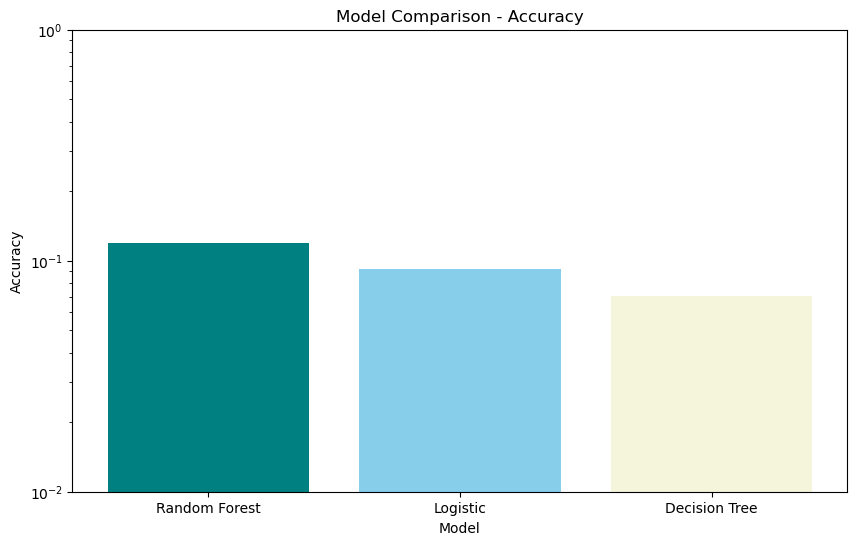

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(comparison_dfa['Model'], comparison_dfa['Accuracy'], color=['teal', 'skyblue', 'beige'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim(0.01, 1)
plt.yscale('log')
plt.show()

### COMPARISION OF MODEL'S PERFORMANCE BASED ON PRECISION_SCORE

In [24]:
comparison_data_b = {
    'Model': ['Random Forest', 'Logistic', 'Decision Tree'],
    'Precision': [precision_rf, precision_lr, precision_dt],
}
comparison_dfb = pd.DataFrame(comparison_data_b)

In [25]:
print("Model Comparison Chart:")
print(comparison_dfb)

Model Comparison Chart:
           Model  Precision
0  Random Forest   0.118910
1       Logistic   0.092195
2  Decision Tree   0.070194


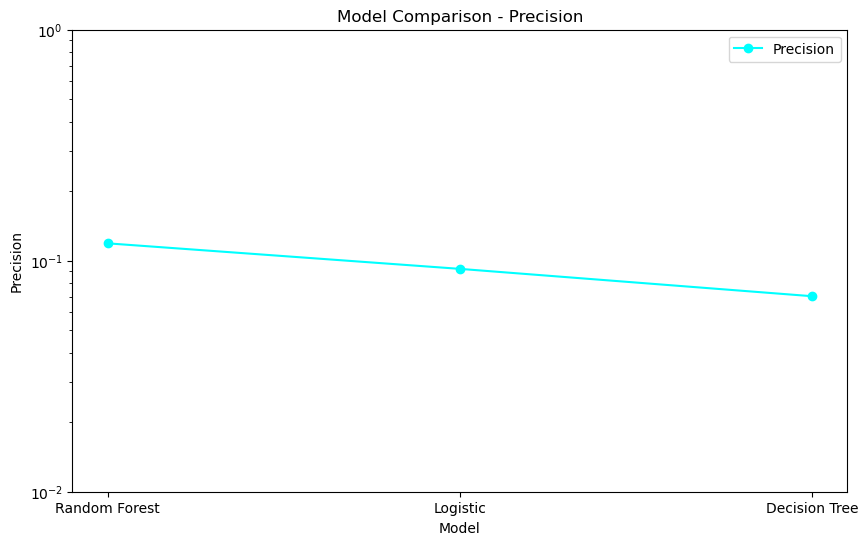

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(comparison_dfb['Model'], comparison_dfb['Precision'], marker='o', linestyle='-', color='cyan', label='Precision')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Comparison - Precision')
plt.ylim(0.01, 1)
plt.yscale('log')
plt.legend()
plt.show()

### COMPARISON OF MODEL'S PERFORMANCE BASED ON RECALL_SCORE

In [27]:
comparison_data_c = {
    'Model': ['Random Forest', 'Logistic', 'Decision Tree'],
    'Recall': [recall_rf, recall_lr, recall_dt],
}
comparison_dfc = pd.DataFrame(comparison_data_c)

In [28]:
print("Model Comparison Chart:")
print(comparison_dfc)

Model Comparison Chart:
           Model    Recall
0  Random Forest  0.118910
1       Logistic  0.092195
2  Decision Tree  0.070194


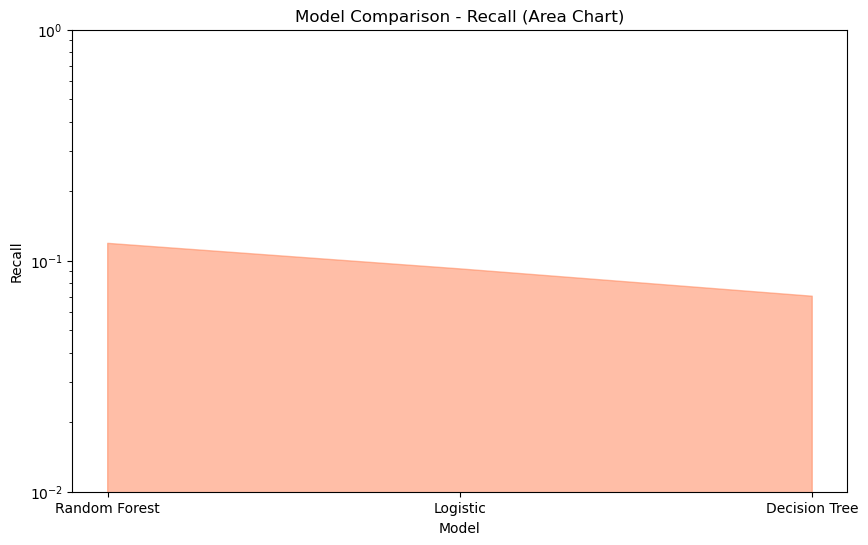

In [29]:
plt.figure(figsize=(10, 6))
plt.fill_between(comparison_dfc['Model'], 0, comparison_dfc['Recall'], alpha=0.5, color=['coral'])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Model Comparison - Recall (Area Chart)')
plt.ylim(0.01, 1)
plt.yscale('log')
plt.show()